<a href="https://colab.research.google.com/github/Ankush70788/Machine-Learning-Projects/blob/main/Finalytics2_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load Data


In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('/content/drive/MyDrive/12month_flight_booking.csv')

Data **Cleaning**






In [5]:

df_dropped_columns = df.drop([' Destination',' Origin','Airline'],axis=1)
threshold=0.7
nan_counts = df_dropped_columns.isna().sum()
columns_to_drop = nan_counts[nan_counts / len(df) > threshold].index
df_cleaned = df_dropped_columns.drop(columns=columns_to_drop)
df_cleaned.fillna(0, inplace=True)
letter_to_number = {letter: idx for idx, letter in enumerate('ABCDEFGHIJKLMNOPQRSTUVWXYZ', start=1)}

# Apply the mapping to the 'AlphabetColumn'
df_cleaned['Booking Class'] = df_cleaned['Booking Class'].map(letter_to_number)
#Using One Hot Encoder
value_mapping = {'Y': 1, 'J': 0}
df_cleaned['Cabin'] = df_cleaned['Cabin'].replace(value_mapping)
new_df=df_cleaned.drop(['Dep_Date','Dep_time'],axis=1)
train_dates=df['Dep_Date']
new_df






,Unnamed: 0,Cabin,Booking Class,Booking Class Fare USD,Flight number,Class RDay Res Hold Total RDay: 292,Class RDay Res Hold Total RDay: 291,Class RDay Res Hold Total RDay: 290,Class RDay Res Hold Total RDay: 289,Class RDay Res Hold Total RDay: 288,...,Class RDay Res Hold Total RDay: 9,Class RDay Res Hold Total RDay: 8,Class RDay Res Hold Total RDay: 7,Class RDay Res Hold Total RDay: 6,Class RDay Res Hold Total RDay: 5,Class RDay Res Hold Total RDay: 4,Class RDay Res Hold Total RDay: 3,Class RDay Res Hold Total RDay: 2,Class RDay Res Hold Total RDay: 1,Class RDay Res Hold Total RDay: 0
0,0,1,14,200.01,304,0.0,0.0,0.0,0.0,0.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10
1,1,1,8,463.65,304,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,6.0,7.0,7.0,7.0,7.0,7
2,2,1,7,149.83,304,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
3,3,1,20,127.29,304,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5
4,4,1,19,90.92,304,0.0,0.0,0.0,0.0,0.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195769,212776,1,9,262.00,65,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
195770,212777,1,20,301.27,65,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
195771,212778,1,13,386.14,65,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
195772,212779,1,8,809.18,65,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5


Model Building


trainX shape == (16245, 14, 279).
trainY shape == (16245, 1).


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 64)            88064     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 100513 (392.63 KB)
Trainable params: 100513 (392.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1219/1219 [==============================] - 75s 55ms/step - loss: 1.1418 - val_loss: 3.1852
Epoch 2/5
1219/1219 [========================

ValueError: ignored

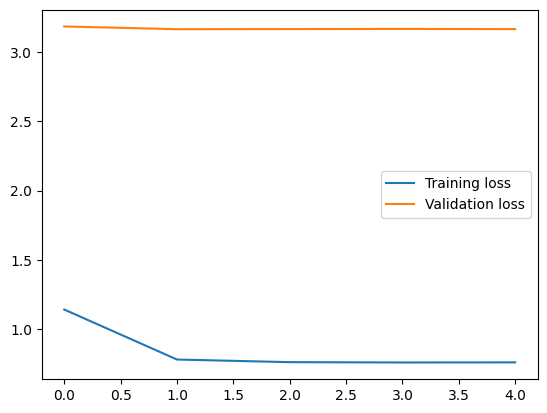

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from keras.models import load_model
from sklearn.metrics import accuracy_score


from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

#Variables for training
cols = list(new_df)[1:298]
df_for_training = new_df[cols].astype(float)
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)
n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.
trainX = []
trainY = []
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 4])
trainX, trainY = np.array(trainX), np.array(trainY)
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(trainY.shape[1]))
model.compile(optimizer='adam', loss='mse')
model.summary()
# fit the model
history = model.fit(trainX, trainY, epochs=2, batch_size= 12, validation_split=0.1, verbose=1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
n_past = 1
n_days_for_prediction=15
predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:])
#shape = (n, 1) where n is the n_days_for_prediction
prediction_copies = np.repeat(prediction,new_df.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,297]
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
df_forecast = pd.DataFrame({'Dep_Date':np.array(forecast_dates),'Class RDay Res Hold Total RDay: 0':y_pred_future})
df_forecast
